In [ ]:
# horizon_detection_comparisons.ipynb
# Eric Graves
# See requirements.txt for environment setup

# Comparing Effectiveness of Various Horizon Detection Methods
For EE 371R Final Project

### Notes:
- cv.Canny():
    - filters with GuassianBlur, kernal size = 5x5
    - has hysteresis buit-in (label pixels as strong or weak and remove weak)

### Development Plan:
- Load images and labels into arrays
    - Iterate through these arrays while testing
    
- Preprocessing Filter:
    - Compare various filtering methods to find one which best preserves horizon edge while removing noise.
        - No filter, Gaussian Blur (LPF), Bilateral Filter, Median Filter.
        - Kernel sizes are variable as well.
    - Use chosen filter for remainder of the project.
    
- Edge Detection:
    - Canny
    - Hough Transform
    - Difference of Gaussians
    - cv2 Contours
    
- Thresholding:
    - Exploits the fact that the sky and ground are usually different colors.
    - Thus segment the image by pixel values, and morphologically expand these to capture "ground" and "sky" regions.
    - The edge between these regions can be used as an approximate horizon line.
    - Median Threshold, Otsu's Method, 
    
- Evaluating Effectiveness:
    - Hand-label horizons in some way.
    - Develop a measure of a method's effectiveness:
        - Sensitivity to the true horizon line.
        - Sensitivity to other edges or noise in the image.
    - Run this measure on the test image set.
    
### Goals:
- Gain experience with image processing in python/Jupyter.
- Develop familarity with various filtering, thresholding, and edge detection methods discussed in EE371R lectures.
- Use discussed image processing methods in a real-world setting: i.e. to a problem with no existing perfect solution.
- Develop a feel for comparitive evaluation of image processing method performance, including creation of "ground truth" label images.
- Make something that "works".


## Imports and environment setup

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
import os
from pathlib import Path # used for path conversion in getting images for testing
%matplotlib inline

print("Current working directory: " + os.getcwd())

Current working directory: /Users/admin/Desktop/Projects/Iris_Challenge



## Load Test Images and Labels

(853, 1280)


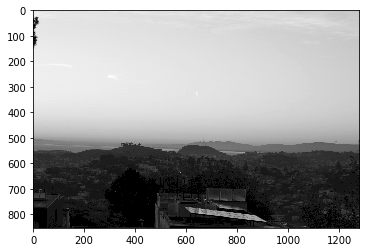

IMAGES:
['/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image1.png', '/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image2.png', '/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image3.png', '/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image4.png', '/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image5.png', '/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image6.png', '/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image7.png', '/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image8.png', '/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image9.png', '/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image10.png', '/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image11.png']


LABELS:
['/Users/admin/Desktop/Projects/Iris_Challenge/test_images_labels/image1_label.png', '/Users/admin/Desktop/Projects/Iris_

In [10]:
img = cv.imread('image1.png',0)
#img_label = cv.imread('/test_images_labels/image1_label.png',0)
h,w = img.shape[:2]
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()

TEST_IMAGES_DIR = 'test_images_labels'

PATH_TO_TEST_IMAGES_DIR = os.path.join(os.getcwd(), Path('test_images_labels'))

# Test images 
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.png'.format(i)) for i in range(1, 12) ]
TEST_LABEL_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}_label.png'.format(i)) for i in range(1, 12) ]

print("IMAGES:\n" + str(TEST_IMAGE_PATHS))
print("\n\nLABELS:\n" + str(TEST_LABEL_PATHS))

## Preprocess with Filtering

In [15]:
img = cv.imread('image1.png',0)
rows,cols = img.shape[:2]

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Blur with Gaussian (low pass) filter: 
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#-- Gaussian sigma = num_rows / 50 # Built into cv2's canny algorithm


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Median Filter
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
img_mb = cv.medianBlur(img,5)

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Bilateral Filter
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ksize = 7 # must be an odd value
img_bl = cv.bilateralFilter(img,ksize,275,75) # bilateral method is slow but the best at keeping edges

# plt.figure(figsize = (36,12))
# plt.subplot(611),plt.imshow(img,cmap='gray')
# plt.subplot(612),plt.imshow(img_bl,cmap='gray')

## Thresholding Methods

In [16]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Otsu's method to calculate thresholds
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
high_thresh, img_thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
low_thresh = 0.5*high_thresh
#plt.subplot(613),plt.imshow(img_thresh,cmap='gray') 

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Median threshold
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
v = np.median(img)
sigma = 0.33
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Adaptive Thresholding method
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
img_blur = cv.blur(img, (9, 9))
img_th = cv.adaptiveThreshold(img_blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 51, 2)


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Histogram Equalization
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# equ = cv2.equalizeHist(img)

# Then binary threshold or truncate
#ret,thresh1 = cv.threshold(equ,150,255,cv.THRESH_BINARY) # Use equalized image
#ret,thresh2 = cv.threshold(equ,150,255,cv.THRESH_TRUNC)

## Edge Detection Methods

In [17]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Find edgemap of input image
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Canny edge detector
#-- Keep egdes with stregth > 5/num_cols


edge1 = cv.Canny(img, lower, upper)

edge2 = cv.Canny(img, low_thresh, high_thresh) # Otsu Thresholding

#plt.subplot(614),plt.imshow(edge1,cmap='gray') 
#plt.subplot(615),plt.imshow(edge2,cmap='gray')


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Connect edges to find contours 
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Hough Transform 
lines = cv.HoughLinesP(edge1, 1, np.pi / 180, 50, None, 200, 150)

img_lines = np.copy(img)
if lines is not None:
    print("Found " + str(len(lines)) + " lines")
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(img_lines, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
else:
    print("No lines found")
    
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Contour method
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
img_cont = np.copy(img)
img_blank = np.zeros((rows,cols))
contours, hierarchy = cv.findContours(edge1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print("Found " + str(len(contours)) + " contours")
cv.drawContours(img_blank, contours, -1, (255, 255, 0), -1)


Found 31 lines
Found 232 contours


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Morphological Operations for Edge Map Enhancement

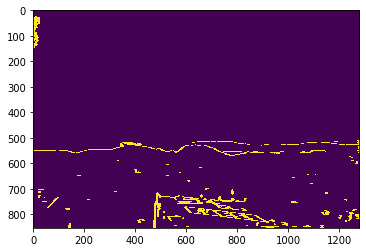

In [18]:
# Morphological Operations to try and complete horizon line

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,3)) # use elongated ellipse kernel (probably better for finding flat-ish horizon)
dilated = cv.dilate(edge1, kernel)
#_, cnts = cv.findContours(dilated.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#print(str(cnts.shape))
plt.imshow(dilated)

## Display Results

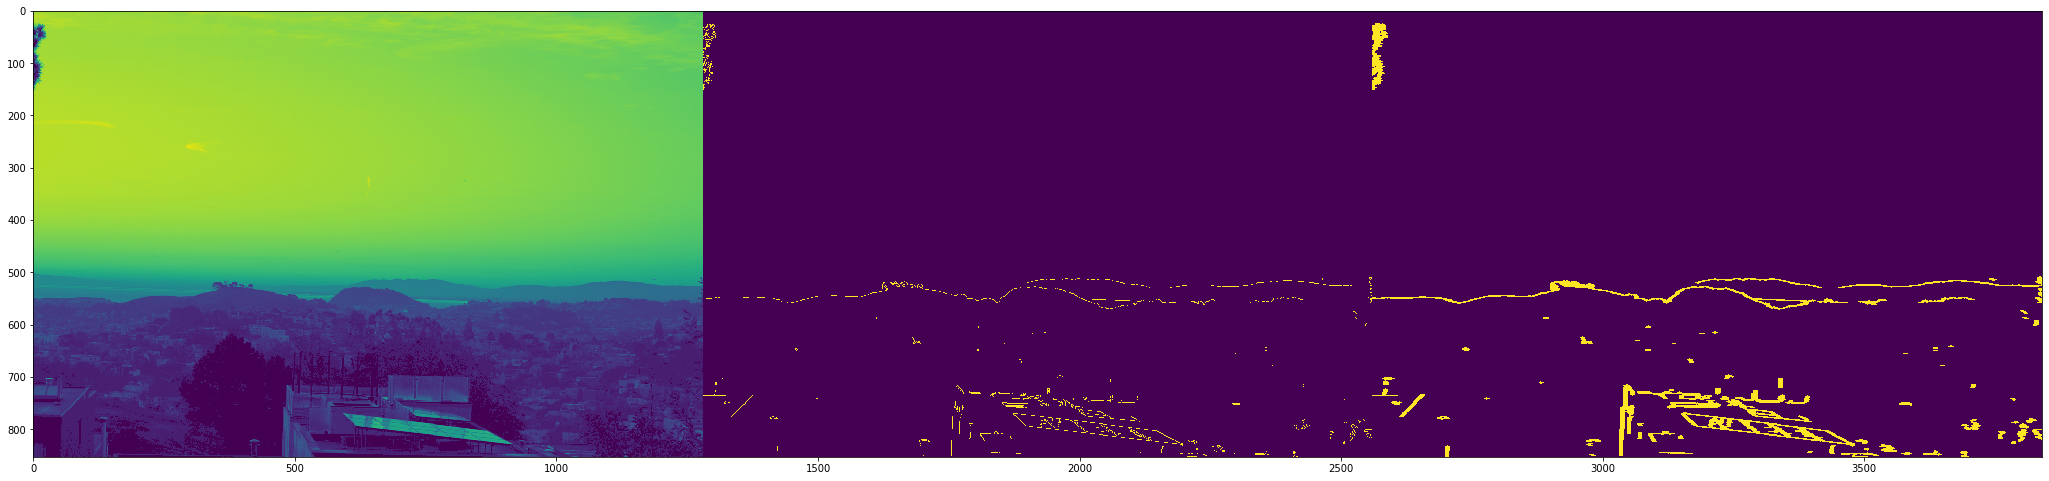

In [20]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Show final output
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plt.subplot(616),plt.imshow(img)

plt.figure(figsize = (36,12))
img_sbs = np.hstack((img, edge1, dilated)) # stack images for comparison side-by-side
plt.imshow(img_sbs)